# Import Libraries

In [17]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest, SelectPercentile

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Dataset

In [18]:
dataset=pd.read_csv('C:/Users/Indriani T Sitorus/Pictures/Dataset remove background_200/Datasetbaru2.csv')

In [19]:
dataset.head()

,Unnamed: 0,contrast,homogeneity,correlation,energy,class
0,700,0.266003,0.970601,0.965359,0.703653,1
1,701,0.308376,0.964254,0.961173,0.673365,1
2,702,0.467766,0.953260,0.950648,0.680419,1
3,703,0.465241,0.953607,0.950539,0.680838,1
4,704,0.275564,0.971259,0.970833,0.686363,1


In [20]:
# Drop unnecessary clumn ('Unnamed: 0')
dropping = ['Unnamed: 0']
dataset.drop(dropping, axis=1, inplace=True)
dataset.head()

,contrast,homogeneity,correlation,energy,class
0,0.266003,0.970601,0.965359,0.703653,1
1,0.308376,0.964254,0.961173,0.673365,1
2,0.467766,0.953260,0.950648,0.680419,1
3,0.465241,0.953607,0.950539,0.680838,1
4,0.275564,0.971259,0.970833,0.686363,1


In [21]:
X=dataset.drop(['class'], axis=1)

In [22]:
y=dataset['class']

# Splitting Dataset

In [23]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20, random_state=5)
X_train.shape, y_train.shape

((1120, 4), (1120,))

In [24]:
X_test.shape, y_test.shape

((280, 4), (280,))

# Selecting Features

In [25]:
sel_=SelectKBest(mutual_info_classif, k=4).fit(X_train, y_train)
X_train.columns[sel_.get_support()]

Index(['contrast', 'homogeneity', 'correlation', 'energy'], dtype='object')

In [26]:
X_train=X_train[['contrast', 'homogeneity', 'correlation', 'energy']]

In [27]:
X_test=X_test[['contrast', 'homogeneity', 'correlation', 'energy']]

# Normalizing training and testing sets

In [28]:
min_train=X_train.min()
range_train=(X_train-min_train).max()
X_train_scaled=(X_train-min_train)/range_train

In [29]:
min_test=X_test.min()
range_test=(X_test-min_test).max()
X_test_scaled=(X_test-min_test)/range_test

# 1. RBF Kernel

In [30]:
svc_model=SVC()
svc_model = SVC(kernel = 'rbf', random_state =0, gamma='scale', C=1.0)    
svc_model.fit(X_train_scaled, y_train)

print('Accuracy of our SVM model on the training data is {:.2f} out of 1'.format(svc_model.score(X_train_scaled, y_train)))
print('Accuracy of our SVM model on the test data is {:.2f} out of 1'.format(svc_model.score(X_test_scaled, y_test)))

Accuracy of our SVM model on the training data is 0.96 out of 1
Accuracy of our SVM model on the test data is 0.95 out of 1


              precision    recall  f1-score   support

           0       0.98      0.93      0.96       552
           1       0.94      0.99      0.96       568

    accuracy                           0.96      1120
   macro avg       0.96      0.96      0.96      1120
weighted avg       0.96      0.96      0.96      1120



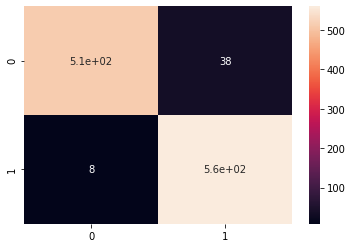

In [31]:
# training accuracy
y_predict=svc_model.predict(X_train_scaled)
cm=confusion_matrix(y_train, y_predict)
sns.heatmap(cm, annot=True)
print(classification_report(y_train, y_predict))

# Predicting RBF Model

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       148
           1       0.95      0.95      0.95       132

    accuracy                           0.95       280
   macro avg       0.95      0.95      0.95       280
weighted avg       0.95      0.95      0.95       280



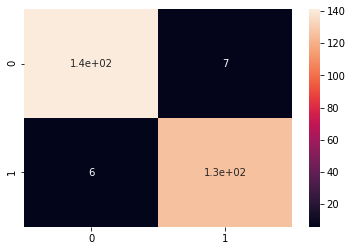

In [32]:
y_predict=svc_model.predict(X_test_scaled)
cm=confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict))

In [33]:
import pickle
filename = 'RBF Model 80_20.pkl'
pickle.dump(svc_model, open(filename, 'wb'))

# 2. Polynomial Kernel

In [35]:
svc_model = SVC(kernel = 'poly', random_state = 0, degree=2, C=1.0)    
svc_model.fit(X_train_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

# Predicting Polynomial Model

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       148
           1       0.95      0.94      0.95       132

    accuracy                           0.95       280
   macro avg       0.95      0.95      0.95       280
weighted avg       0.95      0.95      0.95       280



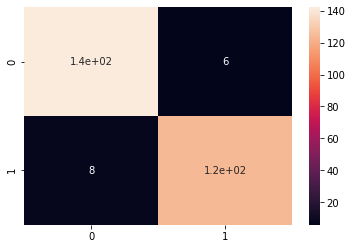

In [25]:
y_predict=svc_model.predict(X_test_scaled)
cm=confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict))

In [26]:
import pickle
filename = 'Polynomial Model 80_20.pkl'
pickle.dump(svc_model, open(filename, 'wb'))

# 3. Sigmoid Kernel

In [15]:
svc_model = SVC(kernel = 'sigmoid', random_state =0, gamma='scale', coef0=0.0)    
svc_model.fit(X_train_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

# Predicting Sigmoid Model

              precision    recall  f1-score   support

           0       1.00      0.04      0.08       148
           1       0.48      1.00      0.65       132

    accuracy                           0.49       280
   macro avg       0.74      0.52      0.36       280
weighted avg       0.76      0.49      0.35       280



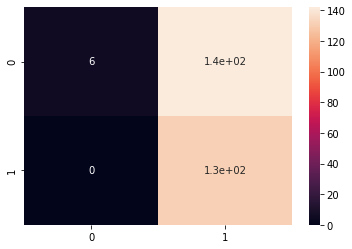

In [28]:
y_predict=svc_model.predict(X_test_scaled)
cm=confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict))

In [29]:
import pickle
filename = 'Sigmoid Model 80_20.pkl'
pickle.dump(svc_model, open(filename, 'wb'))